In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65349ca7dbb1f0d2bb1dcae524069dcc


In [7]:
# Create an empty list to hold the weather data 
city_data = []
#print the beginning of the logging
print("Begging Data Retrieval   ")
print("-------------------------")

# Create counters
record_count = 1 
set_count = 1

# Lopp through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count 
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Begging Data Retrieval   
-------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | alugan
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | pangody
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | kegayli
City not found. Skipping...
Processing Record 16 of Set 1 | lamu
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | khatanga
Processing Record 21 o

Processing Record 38 of Set 4 | cabedelo
Processing Record 39 of Set 4 | dangriga
Processing Record 40 of Set 4 | vanimo
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | praya
Processing Record 43 of Set 4 | agadez
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | manyana
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | dicabisagan
Processing Record 48 of Set 4 | muroto
Processing Record 49 of Set 4 | arroyo
Processing Record 50 of Set 4 | sokolovskoye
Processing Record 1 of Set 5 | tigil
Processing Record 2 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 3 of Set 5 | zlobin
Processing Record 4 of Set 5 | el sauzal
Processing Record 5 of Set 5 | kleive
Processing Record 6 of Set 5 | saint-augustin
Processing Record 7 of Set 5 | salta
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | high level
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | 

Processing Record 26 of Set 8 | taltal
Processing Record 27 of Set 8 | bingol
Processing Record 28 of Set 8 | goroka
Processing Record 29 of Set 8 | itoman
Processing Record 30 of Set 8 | port lincoln
Processing Record 31 of Set 8 | awbari
Processing Record 32 of Set 8 | waitati
Processing Record 33 of Set 8 | vostok
Processing Record 34 of Set 8 | seminole
Processing Record 35 of Set 8 | rungata
City not found. Skipping...
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 38 of Set 8 | eraclea
Processing Record 39 of Set 8 | yatou
Processing Record 40 of Set 8 | san pietro in casale
Processing Record 41 of Set 8 | emba
Processing Record 42 of Set 8 | longonjo
Processing Record 43 of Set 8 | kokoda
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | shakawe
Processing Record 46 of Set 8 | uri
Processing Record 47 of Set 8 | caravelas
Processing Record 48 of Set 8 | helong
Processing Record 49 of S

Processing Record 8 of Set 12 | tsaratanana
Processing Record 9 of Set 12 | asilah
Processing Record 10 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 11 of Set 12 | namatanai
Processing Record 12 of Set 12 | samfya
Processing Record 13 of Set 12 | komsomolskiy
Processing Record 14 of Set 12 | cayenne
Processing Record 15 of Set 12 | deputatskiy
Processing Record 16 of Set 12 | bandar
Processing Record 17 of Set 12 | nurota
Processing Record 18 of Set 12 | farah
Processing Record 19 of Set 12 | hokitika
Processing Record 20 of Set 12 | bonthe
Processing Record 21 of Set 12 | oksfjord
Processing Record 22 of Set 12 | sechura
Processing Record 23 of Set 12 | cortes
Processing Record 24 of Set 12 | tottori
Processing Record 25 of Set 12 | tra vinh
Processing Record 26 of Set 12 | hasaki
Processing Record 27 of Set 12 | houma
Processing Record 28 of Set 12 | phrai bung
City not found. Skipping...
Processing Record 29 of Set 12 | dongsheng
Processing Record 30 of Set 

In [8]:
num_cities = len(city_data)
print(num_cities)

556


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,0.12,55,20,8.05,CA,2022-03-25 02:42:32
1,San Cristobal,7.7669,-72.2250,68.16,66,8,1.41,VE,2022-03-25 02:42:33
2,Nikolskoye,59.7035,30.7861,37.87,99,100,3.85,RU,2022-03-25 02:42:33
3,Kodiak,57.7900,-152.4072,36.91,87,100,14.97,US,2022-03-25 02:42:34
4,Isangel,-19.5500,169.2667,82.42,72,94,13.47,VU,2022-03-25 02:42:34
5,Atuona,-9.8000,-139.0333,79.61,78,98,18.57,PF,2022-03-25 02:37:47
6,Alugan,12.2188,125.4808,83.19,76,97,9.48,PH,2022-03-25 02:42:35
7,Busselton,-33.6500,115.3333,80.26,34,62,7.92,AU,2022-03-25 02:42:35
8,Mehamn,71.0357,27.8492,23.77,86,100,17.69,NO,2022-03-25 02:42:36
9,Pangody,65.8500,74.4859,12.65,95,100,7.52,RU,2022-03-25 02:42:36


In [10]:
new_column_order = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,20,CA,2022-03-25 02:42:32,55,62.4560,-114.3525,0.12,8.05
1,San Cristobal,8,VE,2022-03-25 02:42:33,66,7.7669,-72.2250,68.16,1.41
2,Nikolskoye,100,RU,2022-03-25 02:42:33,99,59.7035,30.7861,37.87,3.85
3,Kodiak,100,US,2022-03-25 02:42:34,87,57.7900,-152.4072,36.91,14.97
4,Isangel,94,VU,2022-03-25 02:42:34,72,-19.5500,169.2667,82.42,13.47
...,...,...,...,...,...,...,...,...,...
551,Yaguajay,7,CU,2022-03-25 02:58:27,80,22.3272,-79.2378,76.57,7.14
552,Kushiro,75,JP,2022-03-25 02:58:27,56,42.9750,144.3747,41.95,10.36
553,Talnakh,100,RU,2022-03-25 02:58:27,92,69.4865,88.3972,11.21,11.07
554,Fort-Shevchenko,100,KZ,2022-03-25 02:58:28,94,44.5086,50.2630,36.79,14.03


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevent fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

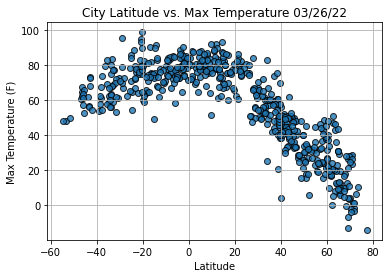

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

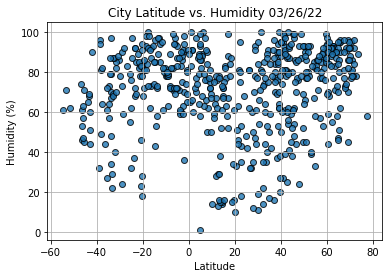

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

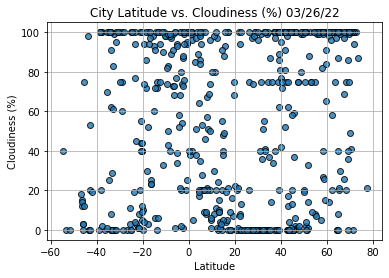

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

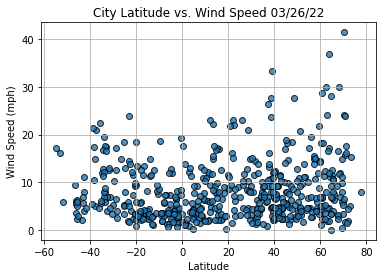

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()